In [79]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [22]:
df = pd.read_csv('processed_dataset_separated.csv')

In [46]:
# create the lists of columns of each type to interpret data
playlist_columns = df.columns[df.columns.str.startswith('playlist_name')]
track_columns = df.columns[df.columns.str.startswith('track')]
album_columns = df.columns[df.columns.str.startswith('album')]
artist_columns = df.columns[df.columns.str.startswith('artist')]


### Conencting playlists by their shared tracks

In [28]:
# creating a dictionary mapping tracks-to-playlists
track_playlists = {}
for index, row in df.iterrows():
    playlist_names = row[playlist_columns]
    tracks = row[track_columns]
    for playlist_name, track in zip(playlist_names, tracks):
        if pd.notnull(track):
            if track not in track_playlists:
                track_playlists[track] = set()
            track_playlists[track].add(playlist_name)

print(track_playlists)


{'Whatever You Like': {'Yeet'}, 'POWER': {'2020', 'workout', 'Run'}, 'Listen To The Music': {'motown', 'oldies'}, 'Ultralight Beam': {'2016', 'babes', 'Best Songs of 2016'}, 'I Would Be Sad': {'Autumnal '}, 'When Will My Life Begin - From "Tangled"/Soundtrack Version': {'Tangled'}, 'Closer': {'Prom 2017', 'MIG', 'Closer', '🔥🔥', 'Jams', 'Bumps', 'Car Music', 'FitDance ', 'My music', 'pregame', 'That New New', '2K16', 'volleyball ', 'worship', 'good vibes', 'Best of 2016', 'Chillstep', 'RR', 'Good vibes only:)'}, 'Something Just Like This': {'SOS', 'Jamzzz', 'randoms', 'Hype playlist', 'LOCO'}, 'Like Woah': {'fuego', 'Straight Fire'}, 'Matchstick': {'2017 spring '}, 'Hollow Life': {"Sophie's Playlist"}, 'Yearning': {'thai'}, 'Do I Wanna Know?': {'Alternative/Rock', 'KG', 'Bittersweet', 'Peaky Blinders'}, 'Floats My Boat': {'summer', "SUMMER 17'", 'Chill', 'Day Drink'}, 'Wicked Games': {'Sexual', 'baby making', 'xo'}, 'Wasted': {'Party', 'windows down', 'club', 'SLAPS', 'ayy lmao', 'summe

In [30]:
# creating a graph where playlists sharing the same songs are connected
G = nx.Graph()
for track, playlists in track_playlists.items():
    playlists_list = list(playlists)
    for i in range(len(playlists_list)):
        for j in range(i + 1, len(playlists_list)):
            G.add_edge(playlists_list[i], playlists_list[j])
print(G)

Graph with 2823 nodes and 6098 edges


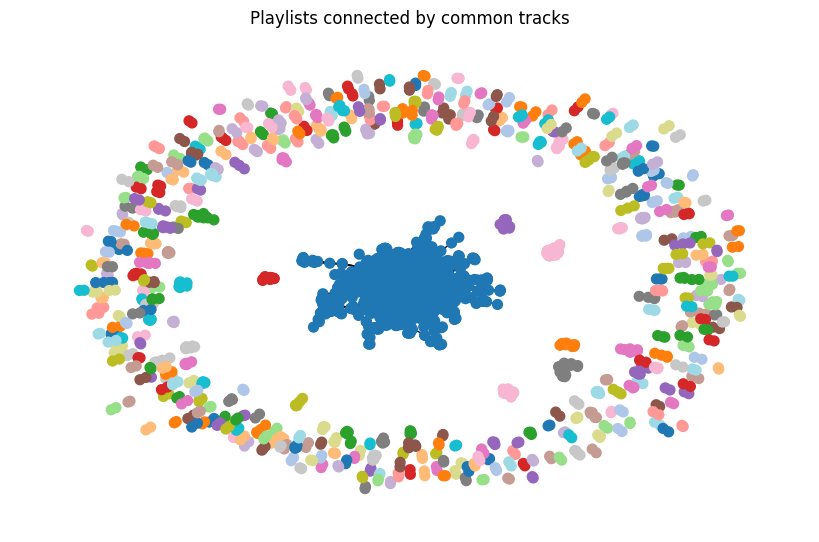

In [40]:
pos = nx.spring_layout(G)
# using a color map with 20 different colors
color_map = {}
for i, component in enumerate(nx.connected_components(G)):
    for node in component:
        color_map[node] = plt.cm.tab20(i % 20) 


plt.figure(figsize=(8, 5))
nx.draw(G, pos=pos, node_color=[color_map[node] for node in G.nodes()], node_size=50, with_labels=False)
plt.title('Playlists connected by common tracks')
plt.show()

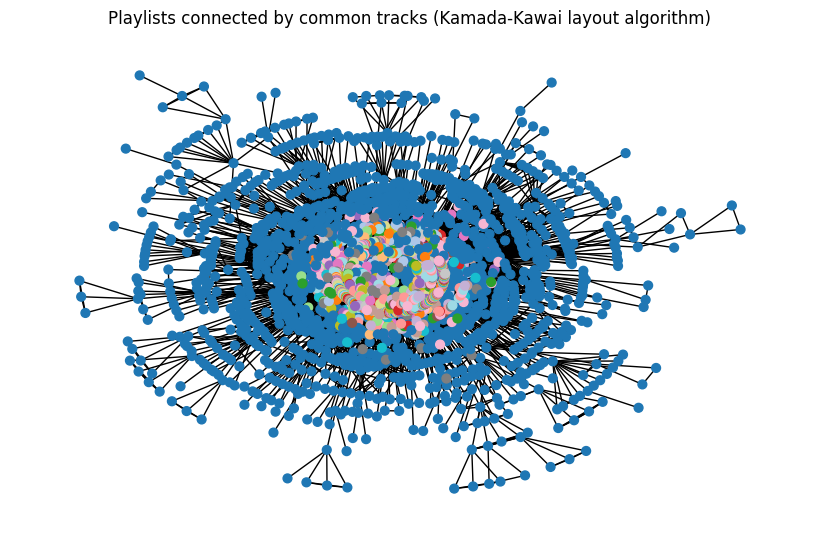

In [95]:
# Kamada-Kawai layout algorithm
pos = nx.kamada_kawai_layout(G)  
color_map = {}
for i, component in enumerate(nx.connected_components(G)):
    for node in component:
        color_map[node] = plt.cm.tab20(i % 20)  

# trying to improve separation between clusters
plt.figure(figsize=(8, 5))
nx.draw(G, pos=pos, node_color=[color_map[node] for node in G.nodes()], node_size=40, with_labels=False)
plt.title('Playlists connected by common tracks (Kamada-Kawai layout algorithm)')
plt.show()

In [41]:
clusters = list(nx.connected_components(G))
print(f'The total number of clusters of playlists connected by shared tracks: {len(clusters)}')

The total number of clusters of playlists connected by shared tracks: 454


### Conencting playlists by their shared albums

In [45]:

# creating a dictionary mapping albums-to-playlists
album_playlists = {}
for index, row in df.iterrows():
    playlist_names = row[playlist_columns]
    albums = row[album_columns]
    for playlist_name, album in zip(playlist_names, albums):
        if pd.notnull(album):
            if album not in album_playlists:
                album_playlists[album] = set()
            album_playlists[album].add(playlist_name)
print(album_playlists)

{'Paper Trail': {'Yeet', 'Throwback'}, 'My Beautiful Dark Twisted Fantasy': {'Right Now ', 'workout', '2020', 'get lit', 'Run'}, 'Toulouse Street': {'motown', 'oldies'}, 'The Life Of Pablo': {'jamss', 'FIRE 🔥', 'litness', 'fye', 'spring', 'get ready!!!', 'Best Songs of 2016', 'lit', 'December 2016', 'Pregame', 'play it', 'babes', 'lit🔥🔥', '2016', 'sail', 'my favs'}, 'Emotionalism (Bonus Track Version)': {'Autumnal '}, 'Tangled': {'Tangled'}, 'Closer': {'Chill House', 'Prom 2017', 'MIG', 'Closer', '🔥🔥', 'Post-Punk', 'Faith', 'Bumps', 'FitDance ', 'My music', 'pregame', 'That New New', '2K16', 'volleyball ', 'good vibes', 'Best of 2016', 'Chillstep', 'RR', 'Good vibes only:)'}, 'Memories...Do Not Open': {'SOS', 'Pump Up The Jam', 'Jamzzz', 'randoms', 'Relax Songs', 'SUMMER VIBES 2017', 'Hype playlist', 'LOCO'}, 'The Incredible True Story': {'fuego', 'Straight Fire', 'Car', 'MySongs'}, 'Matchstick': {'2017 spring '}, 'Coast Modern': {'Pool Party', "Sophie's Playlist"}, 'Jahta Beat: The Lo

In [47]:
# creating a graph where playlists sharing the same albums are connected
G_albums = nx.Graph()
for album, playlists in album_playlists.items():
    playlists_list = list(playlists)
    for i in range(len(playlists_list)):
        for j in range(i + 1, len(playlists_list)):
            G_albums.add_edge(playlists_list[i], playlists_list[j])
print(G_albums)

Graph with 3660 nodes and 13741 edges


In [48]:
clusters_albums = list(nx.connected_components(G_albums))
print(f'The total number of clusters of playlists connected by shared albums: {len(clusters_albums)}')

The total number of clusters of playlists connected by shared albums: 396


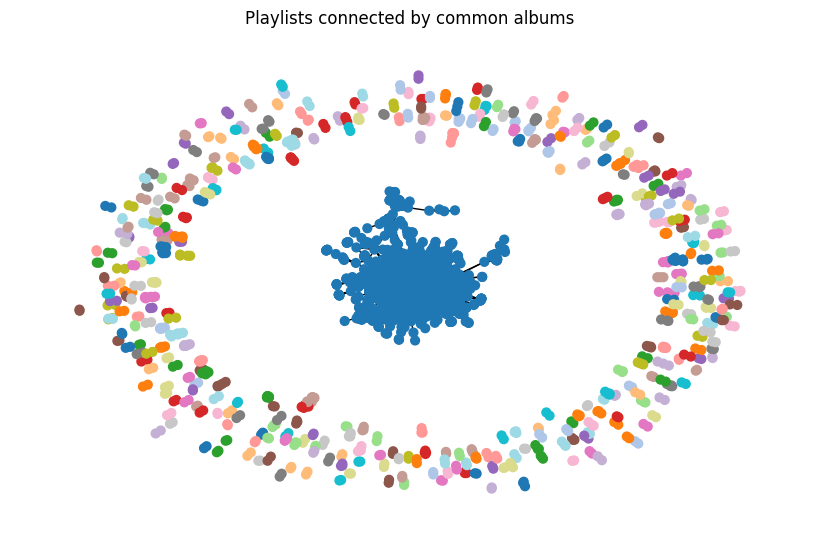

In [49]:
pos = nx.spring_layout(G_albums)
color_map = {}
for i, component in enumerate(nx.connected_components(G_albums)):
    for node in component:
        color_map[node] = plt.cm.tab20(i % 20) 


plt.figure(figsize=(8, 5))
nx.draw(G_albums, pos=pos, node_color=[color_map[node] for node in G_albums.nodes()], node_size=40, with_labels=False)
plt.title('Playlists connected by common albums')
plt.show()

### Conencting playlists by their shared artists

In [57]:

# creating a dictionary mapping artists-to-playlists
artist_playlists = {}
for index, row in df.iterrows():
    playlist_names = row[playlist_columns]
    artists = row[artist_columns]
    for playlist_name, artist in zip(playlist_names, artists):
        if pd.notnull(artist):
            if artist not in artist_playlists:
                artist_playlists[artist] = set()
            artist_playlists[artist].add(playlist_name)

print(artist_playlists)

{'T.I.': {'turnt', 'Yeet', 'Gym Mix', 'Throwback'}, 'Kanye West': {'Right Now ', 'workout', 'Lit', 'get lit', 'RACE DAY', 'anna', 'dope', 'lit🔥🔥', 'Vibin', 'Workout', 'fye', 'LIT 🔥', '2020', 'Fuego', 'Best Songs of 2016', 'Run', 'Pregame', 'Boner Jams', 'rap ', 'trees', 'friday playlist', 'OG', 'pregame', 'litness', 'Party', 'spring', 'get ready!!!', 'lit', 'Butter', 'babes', 'Salad Days', 'sail', 'my favs', 'GET PUMPED!!!', '/rAp', 'Straight fire', 'Rap', 'KANYE', 'Shuffle ', 'jamss', 'FIRE 🔥', 'throwbacks', 'pumpup', 'December 2016', 'play it', 'kanye west', 'My Mixtape', '2016', 'throwback bangers '}, 'The Doobie Brothers': {'motown', 'oldies'}, 'The Avett Brothers': {'Happy', 'mems', 'Spring 2017', 'j chillin', 'not rap', 'Autumnal '}, 'Mandy Moore': {'Tangled'}, 'The Chainsmokers': {'Prom 2017', " Don't Let Me Down", 'winter is coming', 'Free', 'Summer', 'randoms', 'PARTAY', 'MIG', 'LOCO', 'Closer', '🔥🔥', 'SOS', 'Pump Up The Jam', 'halloween', 'fall favorites', 'the good stuff', '

In [58]:
# creating a graph where playlists sharing the same artists are connected
G_artists = nx.Graph()
for artist, playlists in artist_playlists.items():
    playlists_list = list(playlists)
    for i in range(len(playlists_list)):
        for j in range(i + 1, len(playlists_list)):
            G_artists.add_edge(playlists_list[i], playlists_list[j], artist=artist)
print(G_artists)


Graph with 4471 nodes and 40746 edges


In [59]:
clusters_artists = list(nx.connected_components(G_artists))
print(f'The total number of clusters of playlists connected by shared artists: {len(clusters_artists)}')

The total number of clusters of playlists connected by shared artists: 260


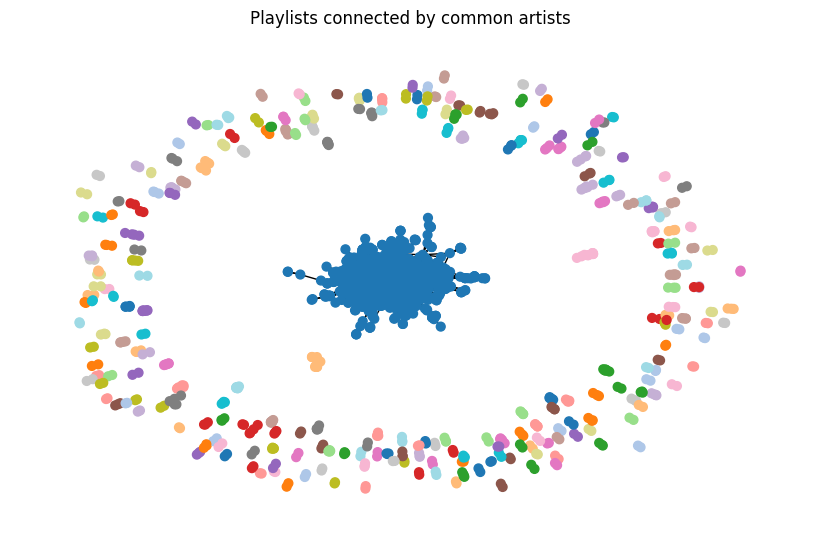

In [54]:
pos = nx.spring_layout(G_artists)
color_map = {}
for i, component in enumerate(nx.connected_components(G_artists)):
    for node in component:
        color_map[node] = plt.cm.tab20(i % 20) 


plt.figure(figsize=(8, 5))
nx.draw(G_artists, pos=pos, node_color=[color_map[node] for node in G_artists.nodes()], node_size=40, with_labels=False)
plt.title('Playlists connected by common artists')
plt.show()

### Comparing the 3 graphs

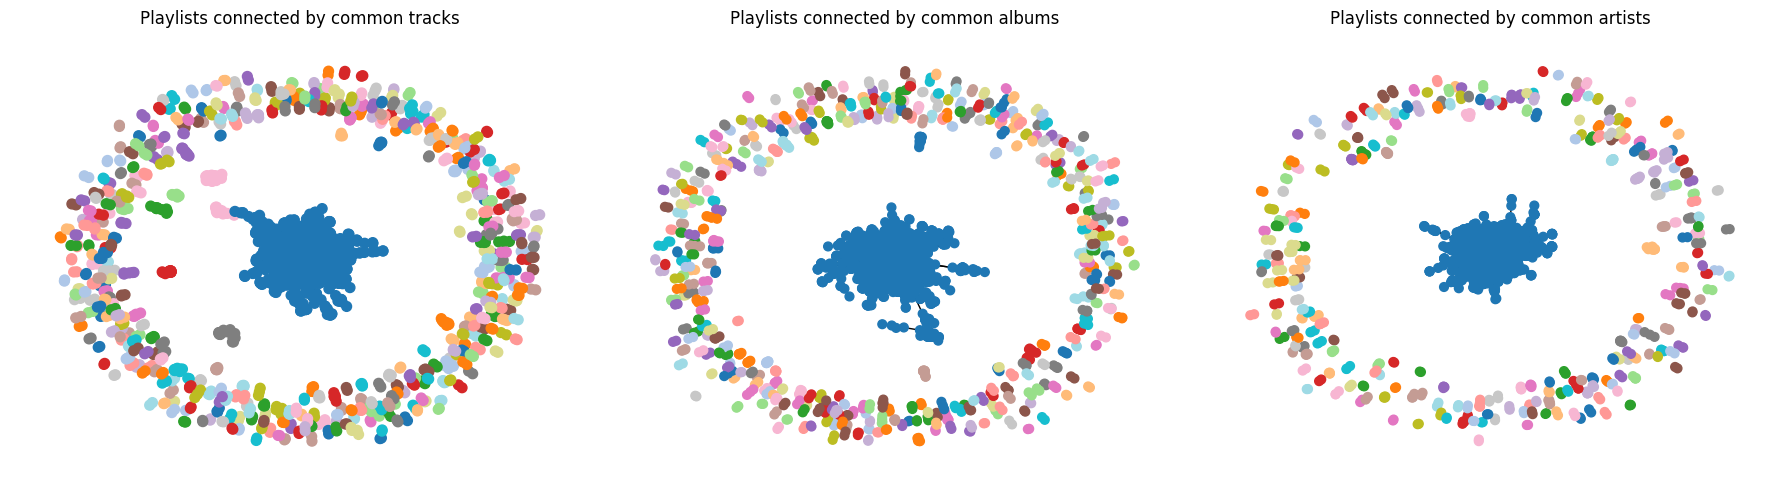

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

# the plot for playlists connected by common tracks
pos_tracks = nx.spring_layout(G)
color_map_tracks = {}
for i, component in enumerate(nx.connected_components(G)):
    for node in component:
        color_map_tracks[node] = plt.cm.tab20(i % 20)
nx.draw(G, pos=pos_tracks, ax=axes[0], node_color=[color_map_tracks[node] for node in G.nodes()], node_size=50, with_labels=False)
axes[0].set_title('Playlists connected by common tracks')

# the plot for playlists connected by common albums
pos_albums = nx.spring_layout(G_albums)
color_map_albums = {}
for i, component in enumerate(nx.connected_components(G_albums)):
    for node in component:
        color_map_albums[node] = plt.cm.tab20(i % 20)
nx.draw(G_albums, pos=pos_albums, ax=axes[1], node_color=[color_map_albums[node] for node in G_albums.nodes()], node_size=40, with_labels=False)
axes[1].set_title('Playlists connected by common albums')

# the plot for playlists connected by common artists
pos_artists = nx.spring_layout(G_artists)
color_map_artists = {}
for i, component in enumerate(nx.connected_components(G_artists)):
    for node in component:
        color_map_artists[node] = plt.cm.tab20(i % 20)
nx.draw(G_artists, pos=pos_artists, ax=axes[2], node_color=[color_map_artists[node] for node in G_artists.nodes()], node_size=40, with_labels=False)
axes[2].set_title('Playlists connected by common artists')

plt.tight_layout()
plt.show()

In [64]:
clusters1 = sorted(nx.connected_components(G), key=len, reverse=True)
clusters2 = sorted(nx.connected_components(G_albums), key=len, reverse=True)
clusters3 = sorted(nx.connected_components(G_artists), key=len, reverse=True)

largest_cluster_size1 = len(clusters1[0])
largest_cluster_size2 = len(clusters2[0])
largest_cluster_size3 = len(clusters3[0])

print("Size of the largest cluster for tracks:", largest_cluster_size1)
print("Size of the largest cluster for albums:", largest_cluster_size2)
print("Size of the largest cluster for artists:", largest_cluster_size3)

Size of the largest cluster for tracks: 1572
Size of the largest cluster for albums: 2643
Size of the largest cluster for artists: 3759


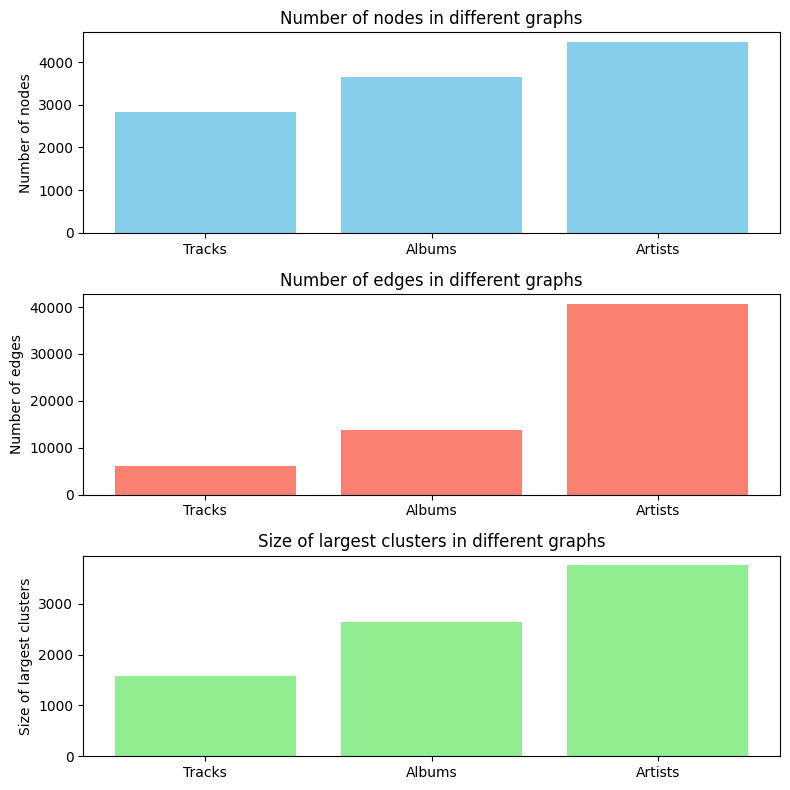

In [69]:
nodes = [
    G.number_of_nodes(),
    G_albums.number_of_nodes(),
    G_artists.number_of_nodes()
]
edges = [
    G.number_of_edges(),
    G_albums.number_of_edges(),
    G_artists.number_of_edges()
]
largest_cluster_sizes = [
    largest_cluster_size1,
    largest_cluster_size2,
    largest_cluster_size3
]
graph_labels = ['Tracks', 'Albums', 'Artists']

# plotting bar charts for the numbers of nodes and edges of the 3 graphs
fig, axs = plt.subplots(3, figsize=(8, 8))

# the bar chart for numbers of nodes
axs[0].bar(graph_labels, nodes, color='skyblue')
axs[0].set_title('Number of nodes in different graphs')
axs[0].set_ylabel('Number of nodes')

# the bar chart for numbers of edges
axs[1].bar(graph_labels, edges, color='salmon')
axs[1].set_title('Number of edges in different graphs')
axs[1].set_ylabel('Number of edges')

# the bar chart for the sizes of the largest respective clusters
axs[2].bar(graph_labels, largest_cluster_sizes, color='lightgreen')
axs[2].set_title('Size of largest clusters in different graphs')
axs[2].set_ylabel('Size of largest clusters')

plt.tight_layout()
plt.show()

#### Investigating the largest cluster in the graph of playlists connected by artists

In [63]:
clusters = sorted(nx.connected_components(G_artists), key=len, reverse=True)

# printing the clusters in decreasing order
# and their respective playlists
for i, cluster in enumerate(clusters, start=1):
    print(f'Cluster {i} (Size: {len(cluster)}):')
    for playlist in cluster:
        print(f'- {playlist}')
    print()

Cluster 1 (Size: 3759):
- boys suck
- Sing-A-Long
- asdf
- peachy 
- rap playlist
- prom
- Workout
- Closer
- HYFR
- fall15.
- Break up songs
- Elevate
- Latina
- Only
- 🔥🔥🔥🔥🔥🔥
- music
- easy
- Waves
- hyphy
- tgif
- Reflection
- PBR&B
- chill 2
- CranK
- CHILL HIP-HOP
- STRIP
- Oldie
- run
- jammy
- hippity hop ;)
- lit🔥
- 🎧🎧
- sad sad sad
- Sexy Time
- SKA
- Best
- 💦💦
- country bangers 
- Thinking.
- misc
- cali
- Cool songs
- RELAXX
- white people music
- Nick
- sundays. 
- Christmas Tunes
- 80s dance
- awesome sauce
- Baller
- EDM Workout
- bottoms up
- tailgate
- Indie Electronica
- Slow Dancing in a Burning Room 
- mhmmm
- JUNE 2017
- Serenity
- get lit
- Bailoteo
- lax
- GOATS 
- Shower Songs
- shower
- All I need
- for you
- goodies
- the fray
- Tercer cielo
- Old country
- Classic R&B
- ride
- Classic Hits
- Remixes
- depressing
- 1983
- Electro
- Sweater Weather
- sleep playlist
- Boner Jams
- Jammies
- QQ
- Patience
- Chill Vibez
- INSPO
- PROM!!
- FRANCO DE VITA
- South
- c

In [70]:
# printing the clusters in decreasing order
# and their respective common artists
for i, cluster in enumerate(clusters, start=1):
    print(f'Cluster {i} (Size: {len(cluster)}):')
    cluster_graph = G_artists.subgraph(cluster)
    common_artists = set()
    for edge in cluster_graph.edges(data=True):
        artist = edge[2].get('artist')
        if artist:
            common_artists.add(artist)
    print(f'Common Artists: {", ".join(common_artists)}')
    print()

Cluster 1 (Size: 3759):
Common Artists: Martin Jensen, Roy Woods, Saving Abel, Boston, Isaiah Rashad, A Great Big World, Milky Chance, Kim Walker-Smith, Relient K, Cage The Elephant, Wave Machines, YG, Conway Twitty, Chiddy Bang, Anthem Lights, Kehlani, alt-J, Snoop Dogg, Jónsi, Icona Pop, Kings Kaleidoscope, Young Money, The Temper Trap, Foster The People, 702, Govinda, Sloan, Dave Matthews Band, Franco De Vita, MS MR, *NSYNC, Tears For Fears, Calle 13, Bakermat, Third Eye Blind, Tory Lanez, Dario Marianelli, Michael Silverman, Dean Martin, Rihanna, Hillsong Worship, Daryl Hall & John Oates, Kenny Chesney, Sean Kingston, Sam Smith, Lil Jon, Alicia Keys, One Direction, Famous Dex, Glass Animals, Sugar Ray, Bebe Rexha, Aidonia, Major Lazer, Cherub, Bruce Springsteen, Bing Crosby, Mike Posner, Birdy, Barry Manilow, Kendrick Lamar, Boys Like Girls, Hardwell, Nicki Minaj, Omarion, J Balvin, Papa Roach, Alexis y Fido, PnB Rock, Pharrell Williams, Miike Snow, Kacy Hill, Aer, Rudimental, La O

In [75]:
clusters = sorted(nx.connected_components(G_artists), key=len, reverse=True)

# getting the largest cluster
biggest_cluster = max(clusters, key=len)
num_rows = len(biggest_cluster)

filtered_df = df[df['playlist_name'].isin(biggest_cluster)].copy()

# removing duplicate rows based on the playlist_name column
filtered_df.drop_duplicates(subset='playlist_name', keep='first', inplace=True)

print(filtered_df['playlist_name'].unique())
print(f"size: {len(filtered_df['playlist_name'].unique())}")

# save the playlists in the largest cluster to a new csv file
filtered_df.to_csv('biggest_cluster.csv', index=False)

['Yeet' '2020' 'motown' ... 'Cafe' 'neon trees' 'Squad']
size: 3759


In [76]:
df = pd.read_csv('biggest_cluster.csv')
playlist_names = df['playlist_name']

# saving an simpler csv file with only the 'playlist_name' column
playlist_names.to_csv('biggest_cluster_simple.csv', index=False)

In [92]:
biggest_cluster_graph = G_artists.subgraph(biggest_cluster)

# counting appearances of each artist in the largest cluster
artist_counter = Counter()
for edge in biggest_cluster_graph.edges(data=True):
    artist = edge[2].get('artist')
    if artist:
        artist_counter[artist] += 1

# printing the artists in decreasing order of appearance
sorted_artists = sorted(artist_counter.items(), key=lambda x: x[1], reverse=True)
for artist, count in sorted_artists:
    print(f'{artist}: {count} times')

Drake: 8456 times
The Weeknd: 1169 times
Kanye West: 1140 times
J. Cole: 1071 times
Kendrick Lamar: 1012 times
Beyoncé: 776 times
Lil Uzi Vert: 775 times
Rihanna: 771 times
The Chainsmokers: 731 times
Ed Sheeran: 699 times
Justin Bieber: 648 times
Coldplay: 628 times
Calvin Harris: 494 times
Chance The Rapper: 493 times
Future: 490 times
Post Malone: 434 times
Childish Gambino: 375 times
Maroon 5: 374 times
Kygo: 344 times
JAY Z: 325 times
Chris Brown: 324 times
Mariah Carey: 320 times
Travis Scott: 298 times
Flume: 275 times
John Mayer: 275 times
Big Sean: 272 times
blackbear: 253 times
Khalid: 253 times
Major Lazer: 251 times
Rae Sremmurd: 251 times
Lil Wayne: 244 times
Hillsong United: 242 times
G-Eazy: 231 times
Lana Del Rey: 231 times
Migos: 209 times
The 1975: 207 times
ASAP Rocky: 206 times
Bruno Mars: 190 times
Young Thug: 190 times
Zac Brown Band: 189 times
Bon Iver: 188 times
Russ: 187 times
Eminem: 167 times
The Lumineers: 166 times
Kid Cudi: 153 times
Flo Rida: 151 times
Sa

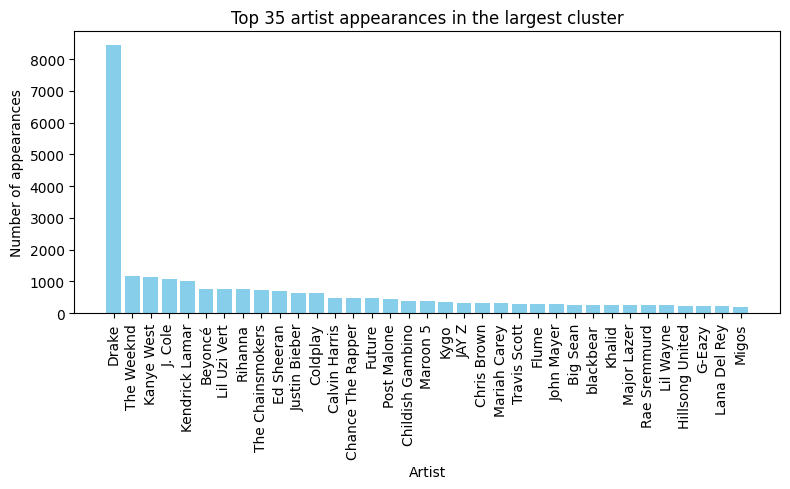

In [94]:
# taking only the top 35 artists for easier plotting
top_artists, top_counts = zip(*sorted_artists[:35])

# plotting the appearances of most popular artists in the largest cluster
plt.figure(figsize=(8, 5))
plt.bar(top_artists, top_counts, color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Number of appearances')
plt.title('Top 35 artist appearances in the largest cluster')
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()